In [66]:
import pandas as pd
import plotly.express as px

df = pd.read_excel("SAT1.xlsx", sheet_name= "Results")
df.head()

,id_ans,clarify,inform,speed,easy,address,access,branding_per,branding,access_agent,branding_per_agent,branding_agent,behaviour,knowledge,avg_sat,NPS,why,gender,id
0,RBUn,5,5,5,5,شعبه بیمه دی,5.0,5.0,5.0,NaN,NaN,NaN,5,5,5.0,10,نوع برخوردبیمه گزارواطلاع رسانی به مشتری,مرد,2594477761
1,V9rk,5,5,5,5,شعبه بیمه دی,5.0,5.0,5.0,NaN,NaN,NaN,5,5,5.0,10,هیچ دلیلی ندارم چون از بیمه نامه خیلی راضی بود...,مرد,3392706299
2,BeUg,5,5,5,5,شعبه بیمه دی,5.0,5.0,5.0,NaN,NaN,NaN,5,5,5.0,10,بیمه خوبی است,مرد,829715762
3,oqGG,5,5,5,5,شعبه بیمه دی,5.0,5.0,5.0,NaN,NaN,NaN,5,5,5.0,8,بازید در محل انجام شد,مرد,51575647
4,IIkE,5,5,5,5,شعبه بیمه دی,5.0,5.0,5.0,NaN,NaN,NaN,5,5,5.0,10,دسترسی‌اسان‌وانجام‌شدن‌سریع‌کار‌,مرد,2063040591


In [67]:
data = pd.read_excel("SAT1.xlsx", sheet_name= "data")
data.head()

,id,شماره بیمه نامه,type_bime,agent,shobe,تاریخ صدور,کد بیمه گذار,بیمه گذار,نوع مشتری,gender,تاریخ شروع,تاریخ پایان,price,status
0,2.740516e+09,5014,مسئوليت,ممتاز مرکزي تهران,ممتاز مرکزي تهران,1399-06-10,8493035,هادي ديگاله,حقیقی,مرد,1399-01-01,1399-06-30,785224.0,شرکت نکرده
1,1.270523e+09,5126,مسئوليت,ممتاز مرکزي تهران,ممتاز مرکزي تهران,1399-06-10,8528006,آتوسا بابامحمدي,حقیقی,زن,1399-01-01,1399-06-31,587156.0,شرکت نکرده
2,4.402988e+08,5195,مسئوليت,ممتاز مرکزي تهران,ممتاز مرکزي تهران,1399-06-05,8539791,آيدا خبازي اسکويي,حقیقی,زن,1399-01-01,1399-06-31,587156.0,شرکت نکرده
3,4.569463e+09,5223,مسئوليت,ممتاز مرکزي تهران,ممتاز مرکزي تهران,1399-06-12,355752,طيبه همتي,حقیقی,زن,1399-01-01,1399-06-31,NaN,شرکت نکرده
4,7.952414e+07,5262,مسئوليت,ممتاز مرکزي تهران,ممتاز مرکزي تهران,1399-06-11,8540557,سيده طراوت واقفي فر,حقیقی,زن,1399-01-01,1399-06-31,587156.0,شرکت نکرده


In [68]:
new_df = pd.merge(data,df, how = "left", on="id")
new_df.shape

(12123, 32)

In [108]:
dfc = new_df.copy()

In [109]:
dfc.status.unique()

array(['شرکت نکرده', 'پاسخ داده'], dtype=object)

In [110]:
dfc["status_n"] = dfc.status.map({"پاسخ داده":1,"شرکت نکرده":0})

In [100]:
{"آتش سوزي":0,"مهندسي":1,"باربري":2,"مخصوص":3,"اتومبيل بدنه":4,"اتومبيل ثالث":5,"مسئوليت":6,"حوادث انفرادي":7}

{'آتش سوزي': 0,
 'مهندسي': 1,
 'باربري': 2,
 'مخصوص': 3,
 'اتومبيل بدنه': 4,
 'اتومبيل ثالث': 5,
 'مسئوليت': 6,
 'حوادث انفرادي': 7}

In [101]:
dfc["type_bime"] = dfc.type_bime.map({"آتش سوزي":0,"مهندسي":1,"باربري":2,"مخصوص":3,"اتومبيل بدنه":4,"اتومبيل ثالث":5,"مسئوليت":6,"حوادث انفرادي":7})

In [34]:
import numpy as np
12123-np.sum(new_df.avg_sat.isna())

827

In [102]:
new_df.status.value_counts().reset_index()

,index,status
0,شرکت نکرده,11353
1,پاسخ داده,770


In [37]:
status = new_df.status.value_counts().reset_index()
status.columns=["status","Freq"]
px.pie(status, values="Freq", names= "status",template='ggplot2', title="تعداد شرکت کنندگان در فرایند رضایت سنجی")

In [38]:
new_df.columns

Index(['id', 'شماره بیمه نامه', 'type_bime', 'agent', 'shobe', 'تاریخ صدور',
       'کد بیمه گذار', 'بیمه گذار', 'نوع مشتری', 'gender_x', 'تاریخ شروع',
       'تاریخ پایان', 'price', 'status', 'id_ans', 'clarify', 'inform',
       'speed', 'easy', 'address', 'access', 'branding_per', 'branding',
       'access_agent', 'branding_per_agent', 'branding_agent', 'behaviour',
       'knowledge', 'avg_sat', 'NPS', 'why', 'gender_y'],
      dtype='object')

In [44]:
type_bime = new_df.type_bime.value_counts().reset_index()
type_bime.columns=["type_bime","Freq"]
type_bime

,type_bime,Freq
0,اتومبيل ثالث,4786
1,مسئوليت,3083
2,اتومبيل بدنه,2521
3,آتش سوزي,1011
4,حوادث انفرادي,610
5,مهندسي,82
6,مخصوص,21
7,باربري,9


In [139]:
bime = dfc.pivot_table("status_n", index=["type_bime"],aggfunc='count',columns="status")
bime["type"] = bime.index
bime.sort_values(by=["پاسخ داده"],inplace = True)
bime

status,شرکت نکرده,پاسخ داده,type
type_bime,,,
مهندسي,81.0,1.0,مهندسي
حوادث انفرادي,578.0,32.0,حوادث انفرادي
آتش سوزي,917.0,94.0,آتش سوزي
مسئوليت,2966.0,117.0,مسئوليت
اتومبيل ثالث,4556.0,230.0,اتومبيل ثالث
اتومبيل بدنه,2225.0,296.0,اتومبيل بدنه
باربري,9.0,NaN,باربري
مخصوص,21.0,NaN,مخصوص


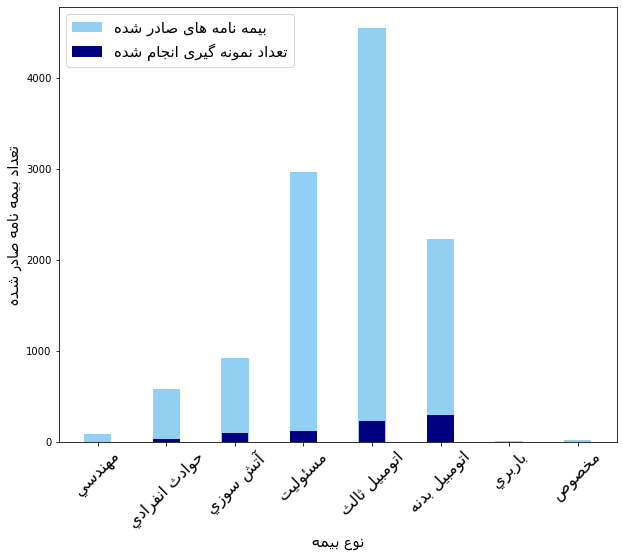

In [176]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('tahoma')
font.set_style('italic')


plt.figure(figsize=(10,8))
ax = plt.subplot(111)

m = [get_display(reshape(x)) for x in bime["type"]]

ax.bar(data=bime, x=m , height = bime["شرکت نکرده"],width=0.4,color="#92cff0",label=get_display(reshape("بیمه نامه های صادر شده")))
ax.bar(data=bime ,x=m ,height= bime["پاسخ داده"],width=0.39,color="navy",label=get_display(reshape("تعداد نمونه گیری انجام شده")))
plt.xlabel(get_display(reshape("نوع بیمه")), fontsize=15,fontproperties=font)
#plt.title(get_display(reshape("نیاز به نمونه های بیشتر برای معنادار بودن رضایت سنجی برحسب نوع بیمه")), fontsize=20,fontproperties=font,fontweight='bold')
plt.xticks(rotation=45,fontsize= 16)
plt.legend( fontsize=15)
plt.ylabel(get_display(reshape("تعداد بیمه نامه صادر شده")), fontsize=15,fontproperties=font)
plt.savefig(r'C:\Users\fatem\Downloads\customer_insurance\type.png')
plt.show()

In [191]:
fig = px.bar(bime, x="type",y = "پاسخ داده",color = "پاسخ داده")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Tahoma",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        family="Tahoma",
        size=18,
        color="blue")
)
fig.update_xaxes(title_font_family="Tahoma")
fig.show()


In [43]:
type_bime = new_df.type_bime.value_counts().reset_index()
type_bime.columns=["type_bime","Freq"]
px.bar(type_bime,x = "type_bime", y="Freq",color="Freq")
#px.bar(status,x = "status", y="Freq",template='ggplot2')

In [155]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
df["m"] = [get_display(reshape(x)) for x in df["shobe"]]

KeyError: 'shobe'

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns 
font = FontProperties()
font.set_family('serif')
font.set_name('tahoma')
font.set_style('italic')


plt.figure(figsize=(18,8))
sns.violinplot(y="avg_sat", x="m", data=df, scale="width", palette="Set3")
plt.ylabel(get_display(reshape("نام شعبه")), fontsize=15,fontproperties=font)
plt.title(get_display(reshape("بازه رضایت سنجی")), fontsize=20,fontproperties=font)
plt.xticks(rotation=45)
#plt.legend( fontsize=15)
#plt.xlabel(get_display(reshape("حداقل تعداد نمونه مورد نیاز")), fontsize=15)
plt.savefig(r'C:\Users\fatem\Downloads\customer_insurance\range.png')

NameError: name 'FontProperties' is not defined

In [3]:
asw = sum(df["status"]=="پاسخ داده")/len(df["status"])*100
othr = 100-asw
asw


93.10761789600967

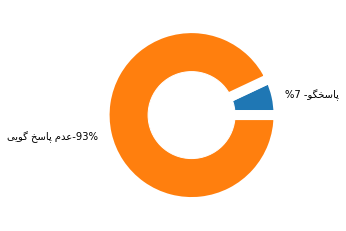

In [182]:
import seaborn as sns

# create data
names = ["پاسخگو- 7%","93%-عدم پاسخ گویی"]
Name = [get_display(reshape(x)) for x in names]
size = [7,93]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), .5, color='white')

# Custom wedges
plt.pie(size, labels=Name, wedgeprops = {'linewidth' : 10, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
#plt.show()
plt.savefig(r'C:\Users\fatem\Downloads\customer_insurance\pie.png')


In [173]:
import pandas as pd

sample = pd.read_excel("samples.xlsx", sheet_name= "SAM")
sample.head()

,SHOBE,ANSWERD,DONOT ANSWER,TOTAL,MIN_SAMPLE
0,ممتاز مرکزي تهران,50,1613,1663,310
1,شيراز,34,643,677,245
2,همدان,21,654,675,245
3,جنوب شرق تهران,28,502,530,225
4,گرگان,27,486,513,217


In [7]:
pip install arabic-reshaper

  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.1-py3-none-any.whl size=16507 sha256=04d3433f2970a5560016afb87a0099eba742031518f546e3fabe6b4433569607

  Stored in directory: c:\users\fatem\appdata\local\pip\cache\wheels\66\6d\91\275a18eea3597b127938aef09550ec38594295ef20eeed4e41
Successfully built arabic-reshaper


In [8]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install fonttools

Note: you may need to restart the kernel to use updated packages.


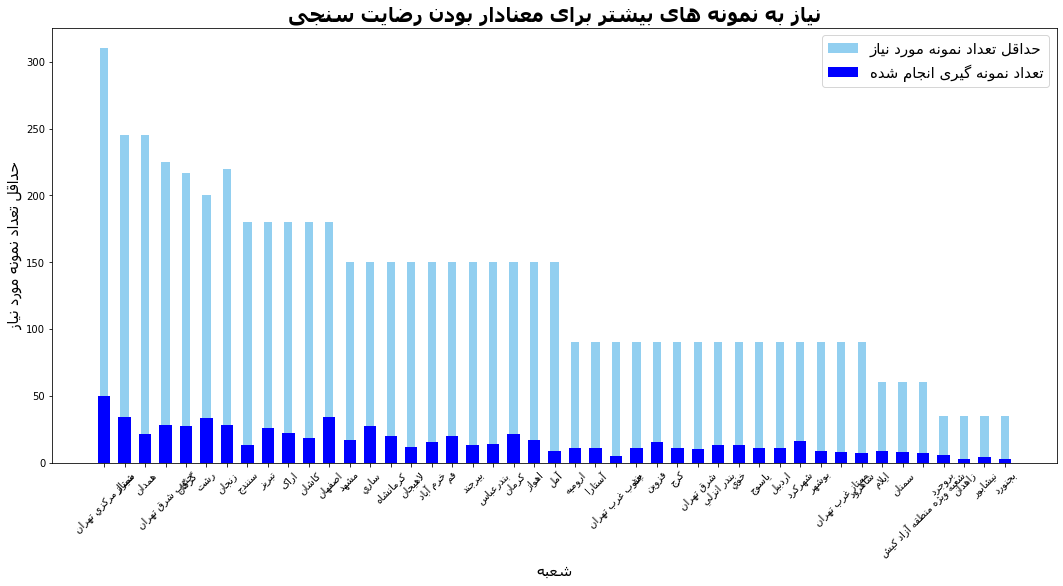

In [174]:
import matplotlib
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('tahoma')
font.set_style('italic')


plt.figure(figsize=(18,8))
ax = plt.subplot(111)

m = [get_display(reshape(x)) for x in sample["SHOBE"]]

ax.bar(data=sample,x=m ,height= sample["MIN_SAMPLE"],width=0.4,color="#92cff0",label=get_display(reshape("حداقل تعداد نمونه مورد نیاز")))
ax.bar(data=sample, x=m , height = sample["ANSWERD"],width=0.6,color="blue",label=get_display(reshape("تعداد نمونه گیری انجام شده")))

plt.xlabel(get_display(reshape("شعبه")), fontsize=15,fontproperties=font)
plt.title(get_display(reshape("نیاز به نمونه های بیشتر برای معنادار بودن رضایت سنجی")), fontsize=20,fontproperties=font,fontweight='bold')
plt.xticks(rotation=45)
plt.legend( fontsize=15)
plt.ylabel(get_display(reshape("حداقل تعداد نمونه مورد نیاز")), fontsize=15,fontproperties=font)
plt.savefig(r'C:\Users\fatem\Downloads\customer_insurance\samples.png')

In [13]:
pd.crosstab(df.easy,df.knowledge,dropna=True,margins=True)

knowledge,1,2,3,4,5,All
easy,,,,,,
1,0,2,0,1,1,4
2,1,0,23,33,30,87
3,0,1,5,3,2,11
4,0,0,16,10,2,28
5,2,3,33,193,466,697
All,3,6,77,240,501,827


In [14]:
import numpy as np

In [15]:
(df.avg_sat)

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
822    2.5
823    2.0
824    2.0
825    2.0
826    2.0
Name: avg_sat, Length: 827, dtype: float64

In [16]:
import pandas as pd
heat = pd.read_excel("heatmap.xlsx", sheet_name= "heatmap")
heat.head()

,shobe,2,2.5,3,3.5,4,4.5,5,total
0,ممتاز مرکزي تهران,NaN,2.0,2.0,9.0,23.0,20,7.0,63
1,شيراز,NaN,NaN,1.0,2.0,12.0,15,8.0,38
2,رشت,1.0,NaN,1.0,3.0,9.0,17,7.0,38
3,اصفهان,1.0,1.0,NaN,8.0,12.0,11,5.0,38
4,ساري,NaN,1.0,1.0,4.0,11.0,8,7.0,32


In [17]:
heat["shobeh"] = [get_display(reshape(x)) for x in heat["shobe"]]
heat.drop(columns='shobe',inplace=True)

In [18]:
ax = sns.heatmap(heat, cmap="YlGnBu")

ValueError: could not convert string to float: 'ﻥﺍﺮﻬﺗ ﻱﺰﮐﺮﻣ ﺯﺎﺘﻤﻣ'

In [191]:
df.why

0               نوع برخوردبیمه گزارواطلاع رسانی به مشتری
1      هیچ دلیلی ندارم چون از بیمه نامه خیلی راضی بود...
2                                          بیمه خوبی است
3                                  بازید در محل انجام شد
4                       دسترسی‌اسان‌وانجام‌شدن‌سریع‌کار‌
                             ...                        
822                                                    م
823    عدم پاسخگویی به تلفنهای شعبه، بی دقتی در صدور،...
824    من بالغ بر ۱۰بیمه پیش شما دارم ...وقتی من تصاد...
825    کوچک بودن فضای نمایندگی، 1 بودن کارکنان و معطل...
826                                             خوب بودن
Name: why, Length: 827, dtype: object

In [192]:
new_df = df.dropna(subset=["why"])

In [193]:
new_df.why

0               نوع برخوردبیمه گزارواطلاع رسانی به مشتری
1      هیچ دلیلی ندارم چون از بیمه نامه خیلی راضی بود...
2                                          بیمه خوبی است
3                                  بازید در محل انجام شد
4                       دسترسی‌اسان‌وانجام‌شدن‌سریع‌کار‌
                             ...                        
822                                                    م
823    عدم پاسخگویی به تلفنهای شعبه، بی دقتی در صدور،...
824    من بالغ بر ۱۰بیمه پیش شما دارم ...وقتی من تصاد...
825    کوچک بودن فضای نمایندگی، 1 بودن کارکنان و معطل...
826                                             خوب بودن
Name: why, Length: 740, dtype: object

In [123]:
text2 = "برای رضایت ازبیمه دی"
text2 = df.why[106:109]
text2

106    باسلام اینجانب از بیمه دی و تعهدات  این بیمه ر...
107                                           مطمئن بودن
108    زیرا من از این بیمه نامه بسیار راضی هستم و قبل...
Name: why, dtype: object

In [194]:
def clean(text):
    text = str(text).replace(" و ",' ')
    text = text.replace("بیمه ",' ')
    text = text.replace("دی",' ')  
    text = text.replace("دي",' ')  
    text = text.replace("بیمه دی",' ')    
    text = text.replace("نمایندگی",' ')
    text = text.replace(" در ",' ')    
    text = text.replace(" با ",' ')    
    text = text.replace(" از ",' ')    
    text = text.replace(" تا ",' ')    
    text = text.replace(" برای ",' ')    
    text = text.replace(" هم ",' ')    
    text = text.replace(" به ",' ')    
    text = text.replace(" بیمه ",' ')    
    text = text.replace(" بيمه ",' ')    
    text = text.replace("سلام ",' ')    
    text = text.replace(" بنده ",' ')    
    text = text.replace("است",' ')    
    text = text.replace("بودن",' ')    
    text = text.replace(" بیمه نامه ",' ')    
    text = text.replace(" که ",' ')    
    text = text.replace(" من ",' ')    
    text = text.replace("من",' ')
    text = text.replace("چون",' ')    
    text = text.replace("نامه",' ')    
    text = text.replace("اسب",' ')    
    text = text.replace("خدمات",' ') 
    text = text.replace("صدور",' ')    
    text = text.replace("میباشد",' ') 
    text = text.replace("می باشد",' ') 
    text = text.replace("بیمه",' ')    
    text = text.replace("اینکه",' ')    
    text = text.replace("می ",' ')    
    text = text.replace(" انجام",' ')    
    text = text.replace(" را ",' ')    
    text = text.replace(" ارایه ",' ')    
    text = text.replace(" ارائه ",' ')  
    text = text.replace(" شعبه ",' ')    
    text = text.replace(" این ",' ')    
    text = text.replace(" شرایط ",' ')    
    text = text.replace(" هستم ",' ') 
    text = text.replace(" هستن ",' ')    
    text = text.replace(" شدن ",' ')    
    text = text.replace(" خیلی ",' ')    
    text = text.replace(" شرکت ",' ')    
    text = text.replace(" آقای ",' ')    
    text = text.replace(" هست ",' ')    
    text = text.replace(" نم ده ",' ')    
    text = text.replace("دارم",' ')    
    text = text.replace("کردم",' ')    
    text = text.replace("شد",' ')    
    text = text.replace("میباشم",' ')    

    return text

#text = text2.apply(clean)
text = new_df.why.apply(clean)
text

0                      نوع برخورد گزارواطلاع رسانی مشتری
1                 هیچ دلیلی ن       راضی بودم، واسه همین
2                                                 خوبی  
3                                           بازید محل   
4                        دسترسی‌اسان‌وانجام‌ ن‌سریع‌کار‌
                             ...                        
822                                                    م
823    عدم پاسخگویی تلفنهای شعبه، بی دقتی  ، کند   رو...
824      بالغ بر ۱۰ پیش شما   ...وقتی تصادف   پدر متو...
825    کوچک   فضای  ، 1   کارکنان معطلی 4، سرعت پایین...
826                                                خوب  
Name: why, Length: 740, dtype: object

In [195]:
text = " ".join(str(v) for v in text)
text

'نوع برخورد گزارواطلاع رسانی مشتری هیچ دلیلی ن       راضی بودم، واسه همین  خوبی   بازید محل    دسترسی\u200cاسان\u200cوانجام\u200c ن\u200cسریع\u200cکار\u200c ا یت آرامش نسبت  قبلی قبلتر آن مقایسه آنها الان  فوق العاده ای بوده اید نظر بنده رضایت ازکارکنان     ان وبخصوص جناب رضاوند میاندواب بلوار انقلاب نماینده صداقت خوش اخلاق خوش برخورد سرعت عمل سرعت عمل رضایت کامل تکریم ارباب رجوع توسط کار د شعبه. محموداباد خلوص   شناخت کامل م ریت وکارشناسان   ودرزمان مراجعات حضوری نهایت احترام وتکریم ارباب ارب نحوه برخورد    درست کارکنان.سرعت دقت کار یکی بهترین شرکت\u200cهای  ای نظر  . بسیار سپاسگذارم خیلی راضی هستم برخورد خوب عملکرد خوب پرسنل شعبه سرعت,دقت،کیفیت رضایت   بالا        صادر کنندگان تجربه خوش برخورد   سرعت دقت واحترام   عالی دسترس   توضیح دادن واطلاعات کافی دادن واحد   همه چی عالی ودرجه یک سرعت عمل رضایت         واقعا کارم سریع وبدون دردسر پیش رفت وبرای پوشش خوب  قیمت    اطمینان رضایت    اطمینان رضایت    برخورد    نماینده   دادن سریع کار بنده. به دلیل   هرلحظه  پرسشی داشته باشی  وهم شهبه ر

In [135]:
import string
from nltk.corpus import stopwords
stop = set(stopwords.words('persian'))
punctuation = list(string.punctuation)
stop.update(punctuation)

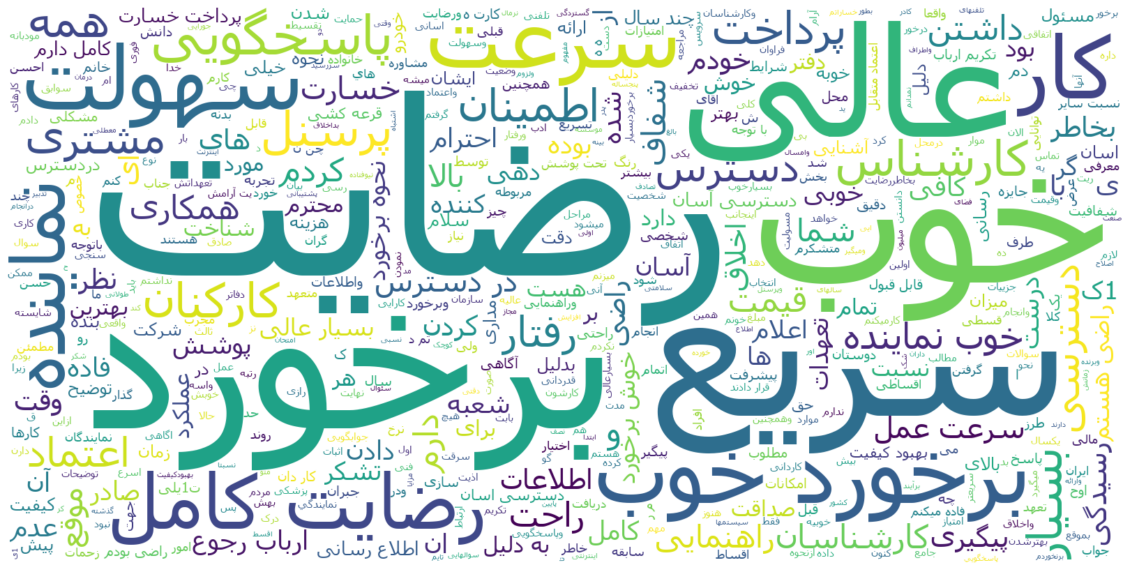

In [161]:
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.figure(figsize=(20,20))
cloud = WordCloud(background_color="white",stopwords=stop , min_font_size = 5, max_words = 500 ,
                  width = 1600 , height = 800,font_path = 'tahoma')
word_cloud = cloud.generate_from_text(get_display(arabic_reshaper.reshape(text)))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r'C:\Users\fatem\Downloads\customer_insurance\word_cloud.png')

In [170]:
source_data={'students':['Jake','Amy','Boyle'],
'math_score':[68,82,97],
'english_score':[70,93,99],
'physics_score':[73,85,95]}

# Segregating the raw data into usuable form
df=pd.DataFrame(source_data,columns=
['students','math_score','english_score','physics_score'])
df['cumulative_score']=df['math_score']+df['english_score']
+df['physics_score']

# Seperating the sub-parts of the given data
x1= df.iloc[0:3,1]
x2= df.iloc[0:3,2]
df

,students,math_score,english_score,physics_score,cumulative_score
0,Jake,68,70,73,138
1,Amy,82,93,85,175
2,Boyle,97,99,95,196


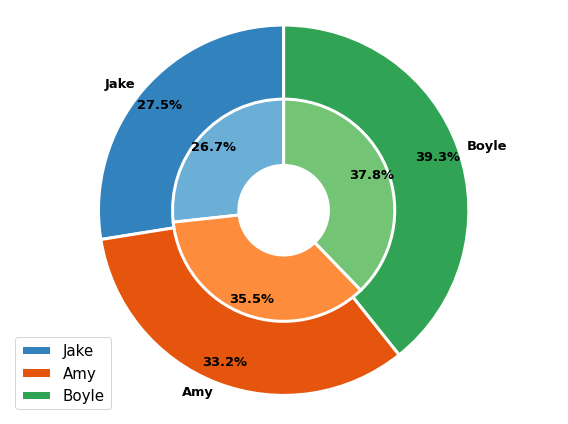

In [177]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Taking raw data of three students
x1 = [68,82,97]
x2 = [70,93,99]
# Setting figure colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1,5,9]))

# Setting the size of the figure
plt.figure(figsize=(8,6))

# Plotting the outer pie
plt.pie(x1, labels = df.iloc[0:3, 0], 
       startangle=90, pctdistance =0.88 ,colors=outer_colors,
       autopct = '%1.1f%%', radius= 1.0, labeldistance=1.05,
       textprops ={ 'fontweight': 'bold','fontsize':13},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# PLotting the inner pie
plt.pie(x2,startangle=90, pctdistance =0.85,colors=inner_colors,
        autopct = '%1.1f%%',radius= 0.60,
       textprops ={'fontweight': 'bold' ,'fontsize':13}, 
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle

# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend( loc=3, fontsize =15)
plt.tight_layout()
plt.show()

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_ans              827 non-null    object 
 1   clarify             827 non-null    int64  
 2   inform              827 non-null    int64  
 3   speed               827 non-null    int64  
 4   easy                827 non-null    int64  
 5   address             822 non-null    object 
 6   access              257 non-null    float64
 7   branding_per        258 non-null    float64
 8   branding            258 non-null    float64
 9   access_agent        569 non-null    float64
 10  branding_per_agent  569 non-null    float64
 11  branding_agent      569 non-null    float64
 12  behaviour           827 non-null    int64  
 13  knowledge           827 non-null    int64  
 14  avg_sat             827 non-null    float64
 15  NPS                 827 non-null    int64  
 16  why     

In [186]:
pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [218]:
from textblob import TextBlob
# from textblob.sentiments import NaiveBayesAnalyzer

def textblob(text):
    testimonial = TextBlob(text)
    #testimonial = testimonial.translate(to="fa") 

    if testimonial.sentiment.polarity == 0:
        return 'neutral'
    elif testimonial.sentiment.polarity > 0:
        return 'positive'
    else:
        return 'negative'
textblob("I am so happy with you")

'positive'

In [214]:
Text = new_df.why.values
Text

array(['نوع برخوردبیمه گزارواطلاع رسانی به مشتری',
       'هیچ دلیلی ندارم چون از بیمه نامه خیلی راضی بودم، واسه همین',
       'بیمه خوبی است', 'بازید در محل انجام شد',
       'دسترسی\u200cاسان\u200cوانجام\u200cشدن\u200cسریع\u200cکار\u200c',
       'امنیت آرامش',
       'نسبت به بیمه قبلی و قبلتر از آن و مقایسه آنها تا الان بیمه فوق العاده ای بوده اید از نظر بنده',
       'رضایت بنده ازکارکنان بیمه دی در استان وبخصوص جناب آقای رضاوند در شعبه میاندواب بلوار انقلاب',
       'نماینده با صداقت و خوش اخلاق و خوش برخورد', 'سرعت عمل',
       'سرعت عمل',
       'رضایت کامل و تکریم ارباب رجوع توسط کارمند شعبه. محموداباد',
       'خلوص',
       'چون شناخت کامل از مدیریت وکارشناسان شعبه دارم ودرزمان مراجعات حضوری نهایت احترام وتکریم ارباب به ارب',
       'نحوه برخورد مناسب و درست کارکنان.سرعت و دقت در کار',
       'یکی از بهترین شرکت\u200cهای بیمه ای از نظر بنده می باشد. بسیار سپاسگذارم',
       'خیلی راضی هستم', 'برخورد خوب و عملکرد خوب پرسنل شعبه',
       'سرعت,دقت،کیفیت', 'رضایتمندی بالا از خد